# Research Data

Даниил Шерки

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

import sys
sys.path.append('../src')
from utils import *
sys.path.remove('../src')

Samples


,id,time,ch0,ch1,ch2
0,1_1,0,372.271894,350.219643,408.527289
1,1_1,1,373.393195,349.845876,411.143658
2,1_1,2,371.898127,350.219643,412.638726
3,1_1,3,371.898127,350.967177,413.386260
4,1_1,4,371.898127,351.340944,414.133794


Labels


,id,target
0,111_1,OD
1,103_1,OD
2,34_2,ID
3,78_1,OD
4,71_2,OD


Merged samples


,id,time,ch0,ch1,ch2,target
0,1_1,0,372.271894,350.219643,408.527289,OD
1,1_1,1,373.393195,349.845876,411.143658,OD
2,1_1,2,371.898127,350.219643,412.638726,OD
3,1_1,3,371.898127,350.967177,413.386260,OD
4,1_1,4,371.898127,351.340944,414.133794,OD


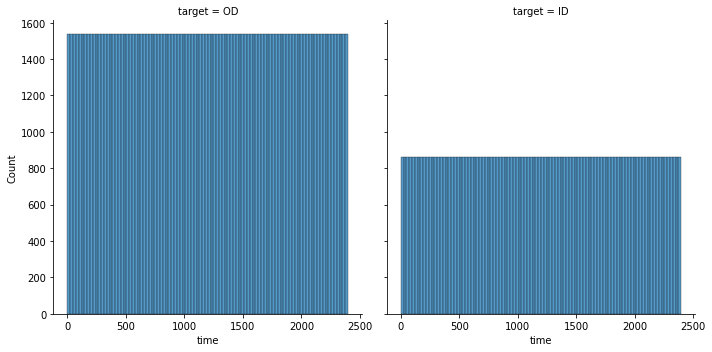

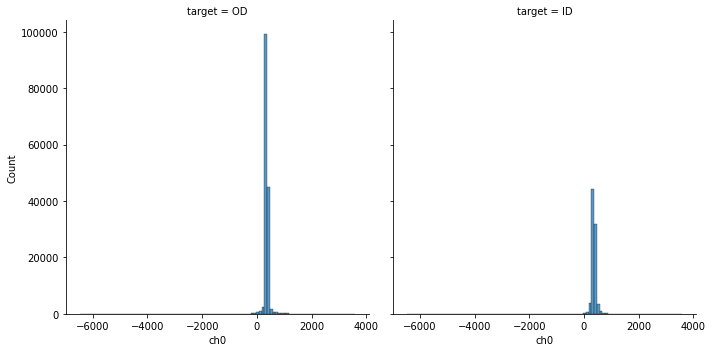

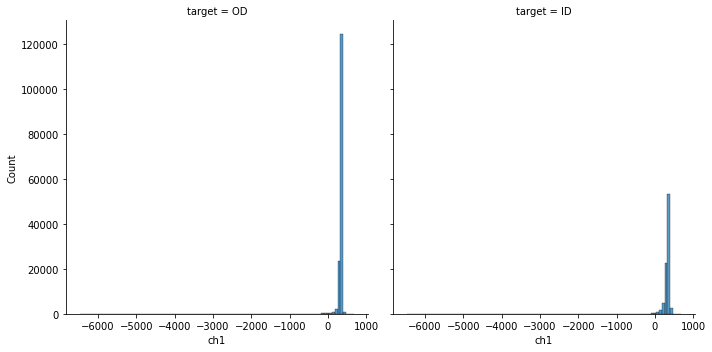

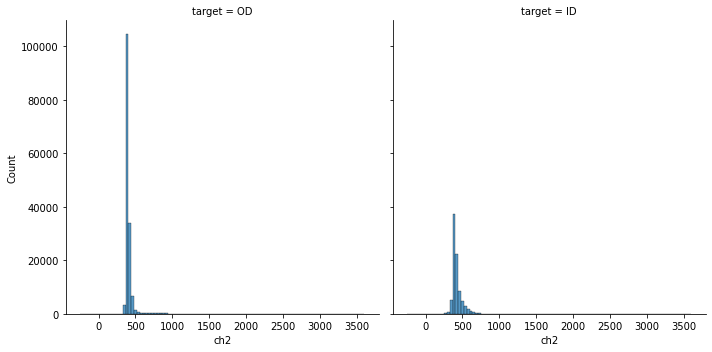

In [5]:
# load data
df_samples = pd.read_csv('../data/data.csv', index_col='Unnamed: 0')
df_targets = pd.read_csv('../data/target_train.csv')

print('Samples')
display(df_samples.head(5))


print('Labels')
display(df_targets.head(5))

df_samples = pd.merge(df_samples, df_targets, on='id')
print('Merged samples')
display(df_samples.head(5))

for i in range(1,5):
    sns.displot(df_samples, x=df_samples.columns[i], col="target", bins=100)
    plt.savefig(f'../imgs/eda_{str(df_samples.columns[i])}.png')
    plt.show()

## Первичные выводы

Видно, что распределение столбца "time" -- равномерное в обоих случаях. Значит, логично предположить, что для всех образцов время распределяется от 0 до 2399.

Распределение каналов приближено к нормальному, но есть множество выбросов.

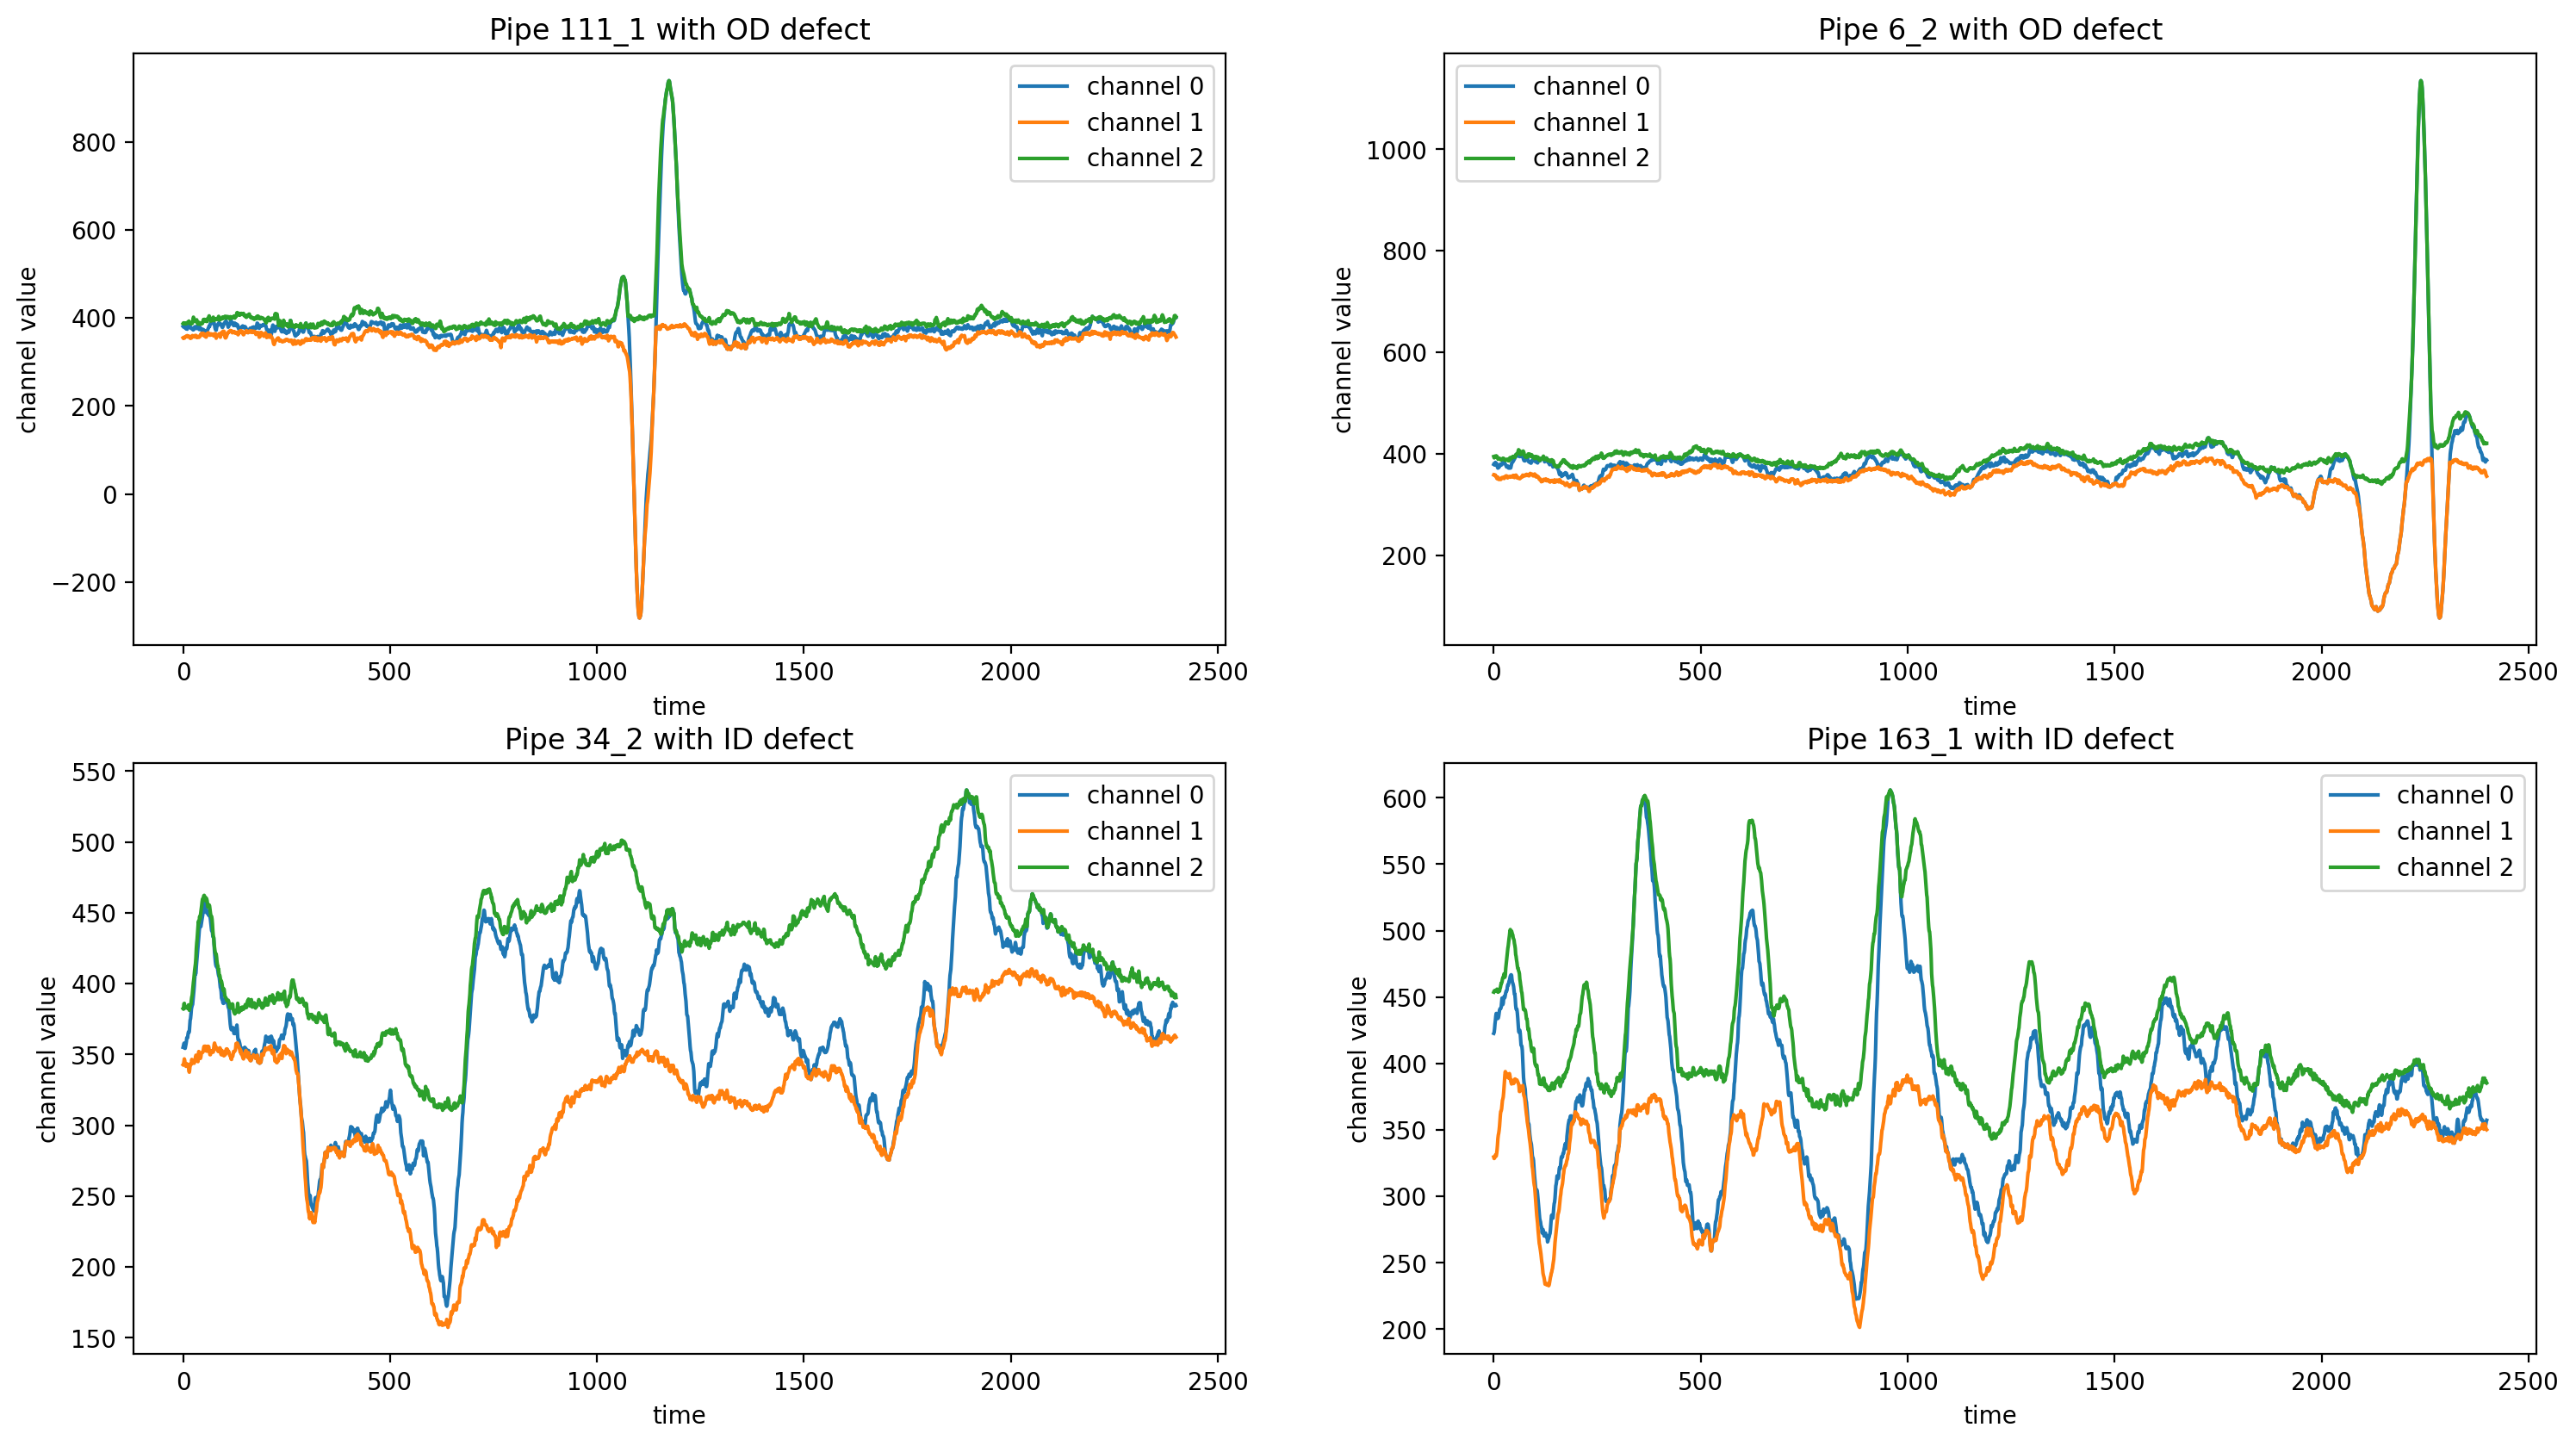

In [3]:
ids = ['111_1', '6_2', '34_2', '163_1']

plt.figure(figsize=(18,10), dpi=200)
for i, id in enumerate(ids):
    plt.subplot(2, len(ids) // 2, i+1)
    visualize_pipe(id, df_samples, df_targets)
plt.savefig('../imgs/examples.png')
plt.show()